## Import packages

In [131]:
import os
import re
import pandas as pd
import glob
import numpy
import numpy as np
from numpy import std
import math as math
import statistics
from statistics import mean
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from collections import Counter
%matplotlib notebook
%matplotlib inline
import requests
import calendar
import pytz
import datetime
import json
import xarray as xr
import matplotlib.patches as mpatches
from datetime import date, datetime, time, timedelta

## Defining sign-in terms

In [73]:
API_Username = "OOIAPI-ZY7MGB9RJFA1F8"
API_Token = "TEMP-TOKEN-ABZNVLTJY0URQZ"

## Fetching the Data

In [71]:
r1 = requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T08:00:01.000Z&endDT=2020-01-01T08:00:01.000Z&limit=1000', auth=(API_Username, API_Token))
data1 = r1.json()
r2 = requests.get('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_hourly?beginDT=2019-01-01T08:00:01.000Z&endDT=2020-01-01T08:00:01.000Z&limit=1000', auth=(API_Username, API_Token))
data2 = r2.json()

## Getting correct date and time

In [79]:
ntp_epoch = datetime(1900, 1, 1)
unix_epoch = datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)


time1 = []
rainRate1 = []
windSpeed1 = []

time2 = []
rainRate2 = []
windSpeed2 = []




for i in range(len(data1)):
    time1.append(ntp_seconds_to_datetime(data1[i]['pk']['time']))
    rainRate1.append(data1[i]["met_rainrte"])
    windSpeed1.append(data1[i]["metbk_a_dcl_instrument-met_relwind_speed"])
    
for i in range(len(data2)):
    time2.append(ntp_seconds_to_datetime(data2[i]['pk']['time']))
    rainRate2.append(data2[i]["met_rainrte"])
    windSpeed2.append(data2[i]["metbk_a_dcl_instrument-met_relwind_speed"])

## Wind speed and rain rate throughout the year

Text(0, 0.5, 'Wind Speed (m/s)')

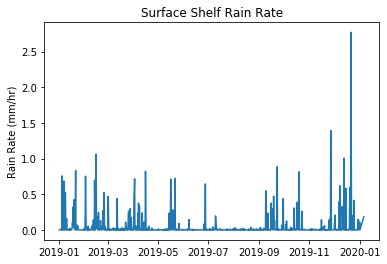

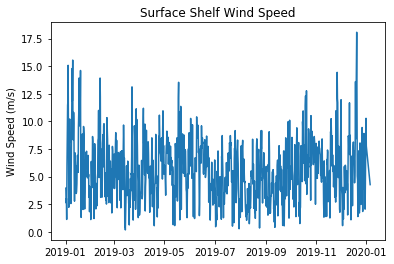

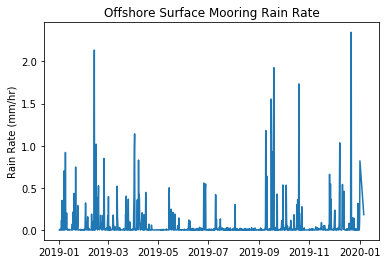

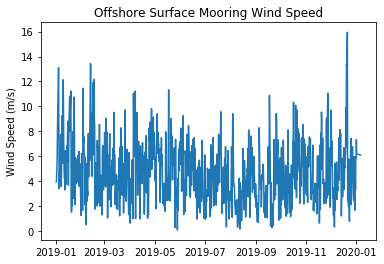

In [149]:
plt.figure(10)

plt.plot(time1,rainRate1)
plt.title('Surface Shelf Rain Rate')
plt.ylabel('Rain Rate (mm/hr)')

plt.figure(20)

plt.plot(time1,windSpeed1)
plt.title('Surface Shelf Wind Speed')
plt.ylabel('Wind Speed (m/s)')

plt.figure(30)

plt.plot(time2,rainRate2)
plt.title('Offshore Surface Mooring Rain Rate')
plt.ylabel('Rain Rate (mm/hr)')

plt.figure(40)

plt.plot(time2,windSpeed2)
plt.title('Offshore Surface Mooring Wind Speed')
plt.ylabel('Wind Speed (m/s)')

## Rain, Wind and combinations throughout the year for Surface Shelf

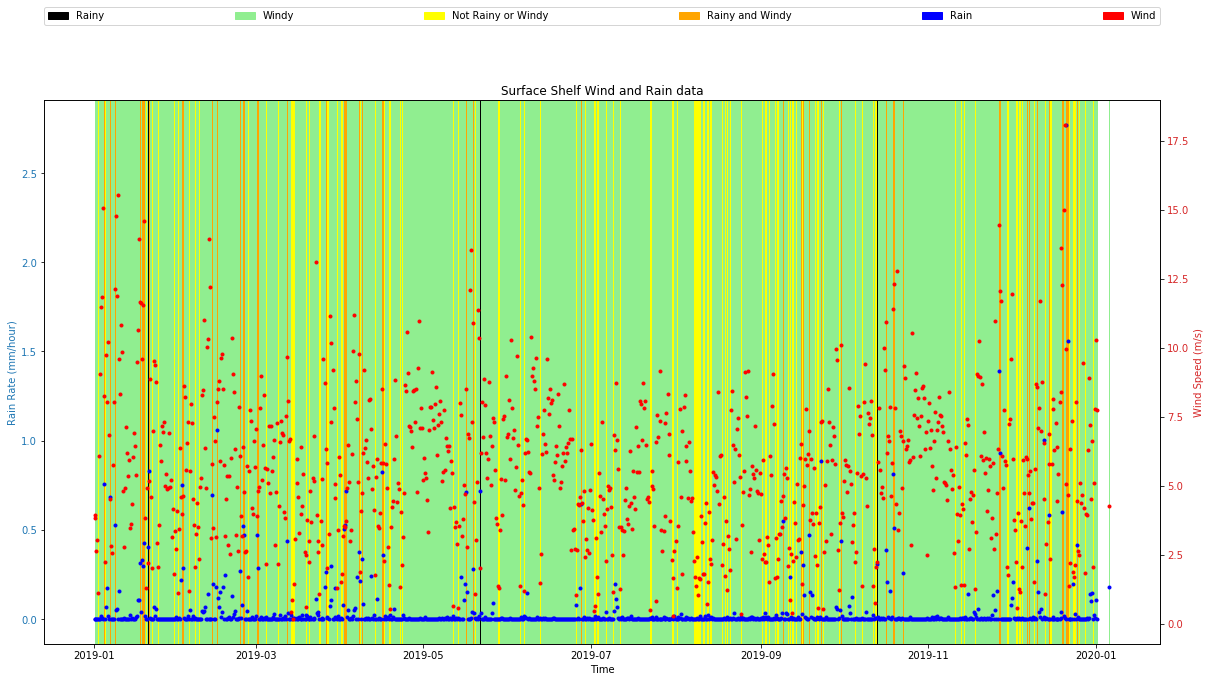

In [144]:
fig, ax1 = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(20)

addedTime = timedelta(0,3600)

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Rain Rate (mm/hour)', color=color)
ax1.plot(time1, rainRate1, '.b')
ax1.tick_params(axis='y', labelcolor=color)

for i in range(0, len(time1)):
    if(rainRate1[i]>=.25 and windSpeed1[i]>= 2.5):
        plt.axvspan(time1[i], time1[i]+addedTime, color='orange')
    elif(rainRate1[i]>=.25):
        plt.axvspan(time1[i], time1[i]+addedTime, color='black')
    elif(windSpeed1[i]>= 2.5):
        plt.axvspan(time1[i], time1[i]+addedTime, color='lightgreen')
    else:
        plt.axvspan(time1[i], time1[i]+addedTime, color='yellow')

ax2 = ax1.twinx()  # start second data set that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Wind Speed (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(time1, windSpeed1, '.r')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Surface Shelf Wind and Rain data')

raindot_patch = mpatches.Patch(color='blue', label = 'Rain')
winddot_patch = mpatches.Patch(color = 'red', label = 'Wind')
rain_patch = mpatches.Patch(color='black', label='Rainy')
wind_patch = mpatches.Patch(color='lightgreen', label='Windy')
plain_patch = mpatches.Patch(color='yellow', label='Not Rainy or Windy')
rainywindy_patch = mpatches.Patch(color='orange', label='Rainy and Windy')

plt.legend(handles = [rain_patch,wind_patch,plain_patch,rainywindy_patch,raindot_patch,winddot_patch], bbox_to_anchor=(0., 1.07, 1., .102), ncol=6, mode="expand", borderaxespad=0.)

## Rain, Wind and combinations throughout the year for Offshore Surface Mooring

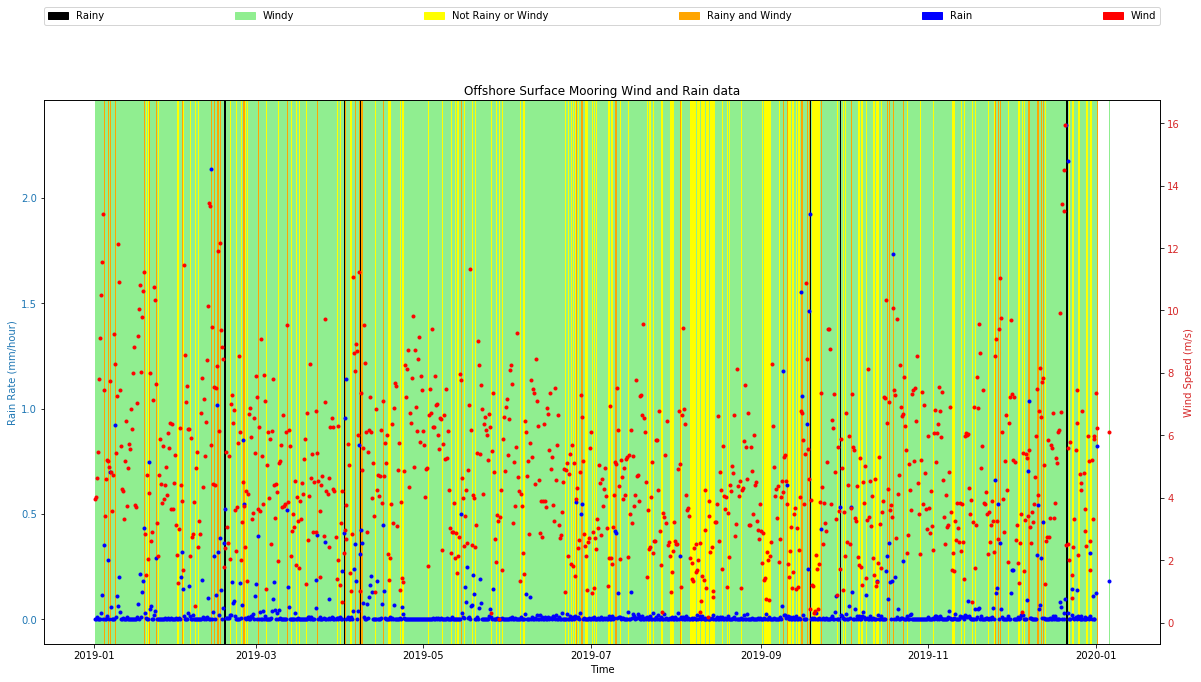

In [137]:
fig, ax1 = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(20)

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Rain Rate (mm/hour)', color=color)
ax1.plot(time2, rainRate2, '.b')
ax1.tick_params(axis='y', labelcolor=color)

addedTime = timedelta(0,3600)

for i in range(0, len(time2)):
    if(rainRate2[i]>=.25 and windSpeed2[i]>= 2.5):
        plt.axvspan(time2[i], time2[i]+addedTime, color='orange')
    elif(rainRate2[i]>=.25):
        plt.axvspan(time2[i], time2[i]+addedTime, color='black')
    elif(windSpeed2[i]>= 2.5):
        plt.axvspan(time2[i], time2[i]+addedTime, color='lightgreen')
    else:
        plt.axvspan(time2[i], time2[i]+addedTime, color='yellow')

ax2 = ax1.twinx()  # start second data set that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Wind Speed (m/s)', color=color)  # we already handled the x-label with ax1
ax2.plot(time2, windSpeed2, '.r')
ax2.tick_params(axis='y', labelcolor=color)



plt.title('Offshore Surface Mooring Wind and Rain data')

raindot_patch = mpatches.Patch(color='blue', label = 'Rain')
winddot_patch = mpatches.Patch(color = 'red', label = 'Wind')
rain_patch = mpatches.Patch(color='black', label='Rainy')
wind_patch = mpatches.Patch(color='lightgreen', label='Windy')
plain_patch = mpatches.Patch(color='yellow', label='Not Rainy or Windy')
rainywindy_patch = mpatches.Patch(color='orange', label='Rainy and Windy')

plt.legend(handles = [rain_patch,wind_patch,plain_patch,rainywindy_patch,raindot_patch,winddot_patch], bbox_to_anchor=(0., 1.07, 1., .102), ncol=6, mode="expand", borderaxespad=0.)

## Correlation between rain data

C:\Users\v-kaglen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


max correlation is at lag 0
max correlation is: 0.428


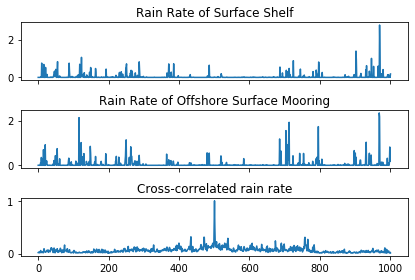

In [116]:
corr = np.correlate(rainRate1, rainRate2, mode='same')

fig, (ax_orig, ax_second, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(rainRate1)
ax_orig.set_title('Rain Rate of Surface Shelf')
ax_second.plot(rainRate2)
ax_second.set_title('Rain Rate of Offshore Surface Mooring')
ax_corr.plot(corr/max(corr))
ax_corr.set_title('Cross-correlated rain rate')
fig.tight_layout()
fig.show()

maxlag = lags[np.argmax(ccor)]
maxcor = round(ccor[np.argmax(ccor)],3)
print("max correlation is at lag %d" % maxlag)
print("max correlation is:", maxcor)

## Correlation between wind data

C:\Users\v-kaglen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


max correlation is at lag 0
max correlation is: 0.428


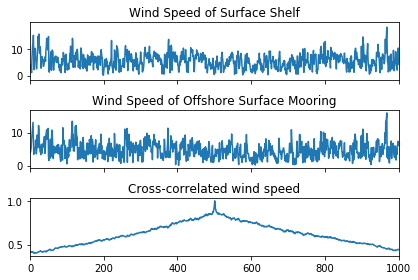

In [147]:
corr = np.correlate(windSpeed1, windSpeed2, mode='same')

fig, (ax_orig, ax_second, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(windSpeed1)
ax_orig.set_title('Wind Speed of Surface Shelf')
ax_second.plot(windSpeed2)
ax_second.set_title('Wind Speed of Offshore Surface Mooring')
ax_corr.plot(corr/max(corr))
ax_corr.set_title('Cross-correlated wind speed')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()


maxlag = lags[np.argmax(ccor)]
maxcor = round(ccor[np.argmax(ccor)],3)
print("max correlation is at lag %d" % maxlag)
print("max correlation is:", maxcor)

## Defining Monthly Average Function

In [93]:
def monthavg(time,obj):
    
    monthtracker = []
    
    m = 0
    i = 0
    c = 0
    objsum = 0
    
    while m < 12:
        
        while time1[i].month == m+1:
            objsum += obj[i]
            i += 1
            c += 1
        
        monthtracker.append(objsum/c)
        c = 0
        objsum = 0
        m += 1
    
    return monthtracker

## Finding Monthly Averages

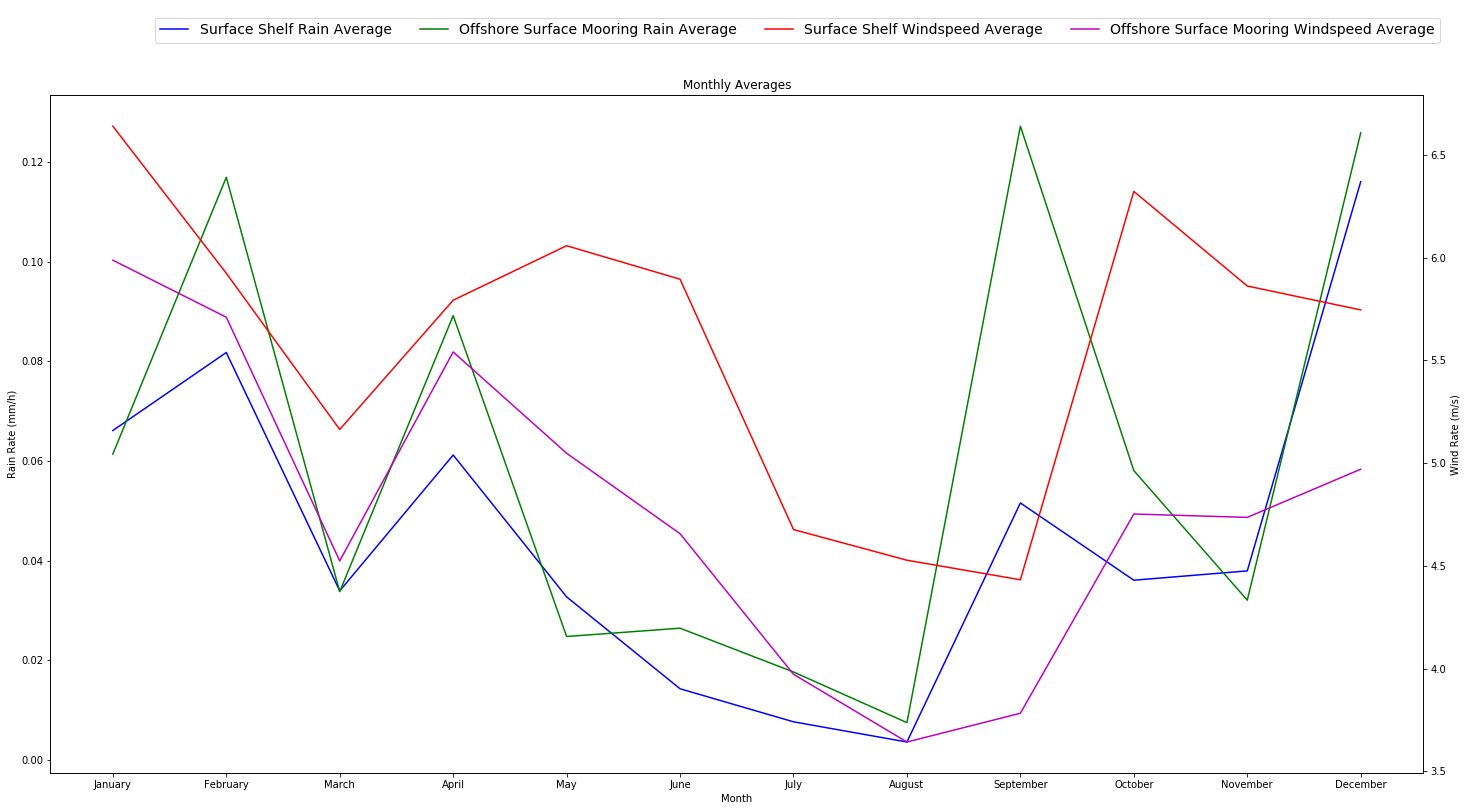

Max average rain rate for Surface Shelf is: 0.116
Max average rain rate for Offshore Surface Mooring is: 0.127
Max average wind rate for Surface Shelf is: 6.64
Max average wind rate for Offshore Surface Mooring is: 5.988
Min average rain rate for Surface Shelf is: 0.004
Min average rain rate for Offshore Surface Mooring is: 0.007
Min average wind rate for Surface Shelf is: 4.433
Min average wind rate for Offshore Surface Mooring is: 3.643


In [148]:
RainAvg1 = monthavg(time1,rainRate1)
WindAvg1 = monthavg(time1,windSpeed1)
RainAvg2 = monthavg(time2,rainRate2)
WindAvg2 = monthavg(time2,windSpeed2)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig,ax = plt.subplots()
ax2 = ax.twinx()
fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout()

ax.plot(months, RainAvg1, 'b', label = 'Surface Shelf Rain Average')
ax.plot(months, RainAvg2, 'g', label = 'Offshore Surface Mooring Rain Average')
ax.set_xlabel('Month')
ax.set_ylabel('Rain Rate (mm/h)')

ax2.plot(months, WindAvg1, 'r', label = 'Surface Shelf Windspeed Average')
ax2.plot(months, WindAvg2, 'm', label = 'Offshore Surface Mooring Windspeed Average')
ax2.set_ylabel('Wind Rate (m/s)')


fig.legend(prop={'size':14}, bbox_to_anchor=(0., 1, 1., .102), ncol=4, borderaxespad=0.)
plt.title('Monthly Averages')
plt.show()
ax.legend()

Max1 = round(max(RainAvg1),3)
Max2 = round(max(RainAvg2),3)
Max3 = round(max(WindAvg1),3)
Max4 = round(max(WindAvg2),3)
Min1 = round(min(RainAvg1),3)
Min2 = round(min(RainAvg2),3)
Min3 = round(min(WindAvg1),3)
Min4 = round(min(WindAvg2),3)


print("Max average rain rate for Surface Shelf is:", Max1)
print("Max average rain rate for Offshore Surface Mooring is:", Max2)
print("Max average wind rate for Surface Shelf is:", Max3)
print("Max average wind rate for Offshore Surface Mooring is:", Max4)
print("Min average rain rate for Surface Shelf is:", Min1)
print("Min average rain rate for Offshore Surface Mooring is:", Min2)
print("Min average wind rate for Surface Shelf is:", Min3)
print("Min average wind rate for Offshore Surface Mooring is:", Min4)